In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Image

%load_ext autoreload
%autoreload 1
%aimport notebook_utils

sns.set_context('notebook', font_scale=1.5)
sns.set_style('white')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
root = '/Users/primdal/lustre/pulling/predict_bipy/'
model_root = root + 'models/'
csv_path = model_root + 'tun-mol-seed-1-frac-train-0.1-performance.csv'
df = pd.read_csv(csv_path)
df.sort_values(by='holdout_loss', inplace=True)
df['rank'] = range(len(df))

In [4]:
df.head()

,basename,best_epoch,best_val_acc,best_val_loss,extra_dense,holdout_acc,holdout_loss,lower_cutoff,n_nodes,network,smoothing,upper_cutoff,rank
5,recurrent_unit_lstm__n_nodes_6__extra_dense_Fa...,88,0.911111,0.201314,extra_dense_False,0.911111,0.267776,lower_cutoff_1e-07,n_nodes_6,recurrent_unit_lstm,smoothing_None,upper_cutoff_0.1,0
8,recurrent_unit_lstm__n_nodes_10__extra_dense_F...,74,0.955556,0.284816,extra_dense_False,0.911111,0.338329,lower_cutoff_1e-07,n_nodes_10,recurrent_unit_lstm,smoothing_None,upper_cutoff_0.1,1
15,recurrent_unit_lstm__n_nodes_32__extra_dense_F...,13,0.911111,0.337322,extra_dense_False,0.866667,0.431072,lower_cutoff_1e-07,n_nodes_32,recurrent_unit_lstm,smoothing_1,upper_cutoff_0.1,2
4,recurrent_unit_lstm__n_nodes_6__extra_dense_Tr...,42,0.911111,0.276636,extra_dense_True,0.844444,0.434777,lower_cutoff_1e-07,n_nodes_6,recurrent_unit_lstm,smoothing_None,upper_cutoff_0.1,3
12,recurrent_unit_lstm__n_nodes_10__extra_dense_F...,78,0.911111,0.341724,extra_dense_False,0.800000,0.445119,lower_cutoff_1e-07,n_nodes_10,recurrent_unit_lstm,smoothing_1,upper_cutoff_0.1,4


In [5]:
best_loss = {}

recurrent_unit_lstm__n_nodes_32__extra_dense_False__upper_cutoff_0.1__lower_cutoff_1e-07__smoothing_1
recurrent_unit_gru__n_nodes_32__extra_dense_False__upper_cutoff_0.1__lower_cutoff_1e-07__smoothing_1
recurrent_unit_gru__n_nodes_32__extra_dense_True__upper_cutoff_0.1__lower_cutoff_1e-07__smoothing_1
recurrent_unit_gru__n_nodes_16__extra_dense_True__upper_cutoff_0.1__lower_cutoff_1e-07__smoothing_1
recurrent_unit_gru__n_nodes_10__extra_dense_True__upper_cutoff_0.1__lower_cutoff_1e-07__smoothing_1
recurrent_unit_gru__n_nodes_16__extra_dense_True__upper_cutoff_0.1__lower_cutoff_1e-07__smoothing_1
recurrent_unit_lstm__n_nodes_16__extra_dense_False__upper_cutoff_0.1__lower_cutoff_1e-07__smoothing_1
recurrent_unit_gru__n_nodes_16__extra_dense_True__upper_cutoff_0.1__lower_cutoff_1e-07__smoothing_1
recurrent_unit_gru__n_nodes_16__extra_dense_True__upper_cutoff_0.1__lower_cutoff_1e-07__smoothing_1
recurrent_unit_gru__n_nodes_16__extra_dense_False__upper_cutoff_0.1__lower_cutoff_1e-07__smooth

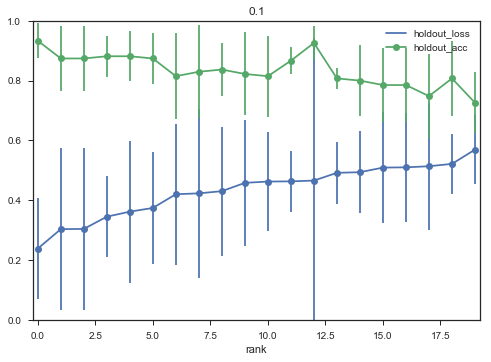

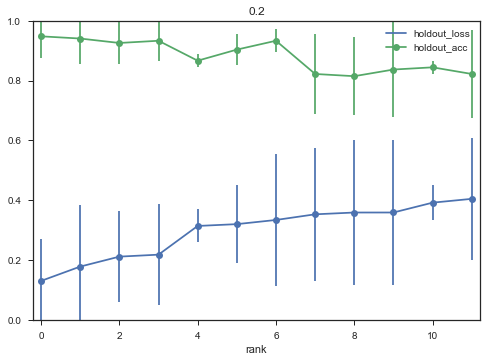

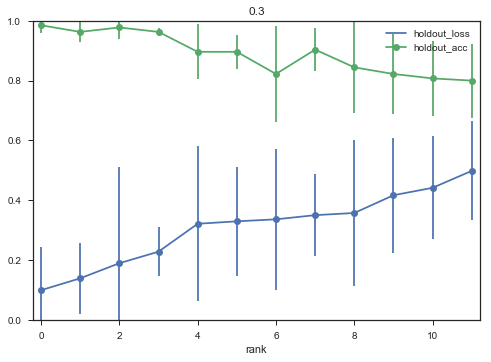

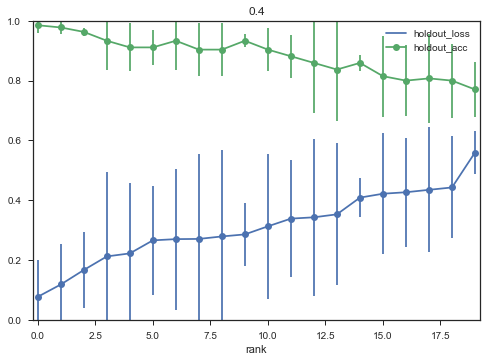

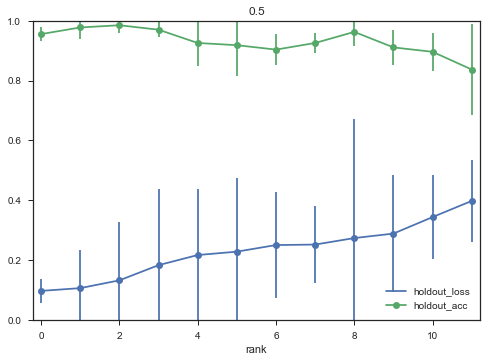

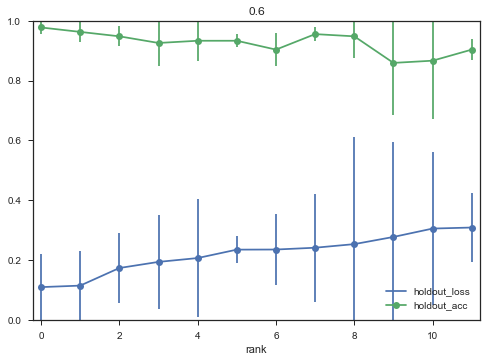

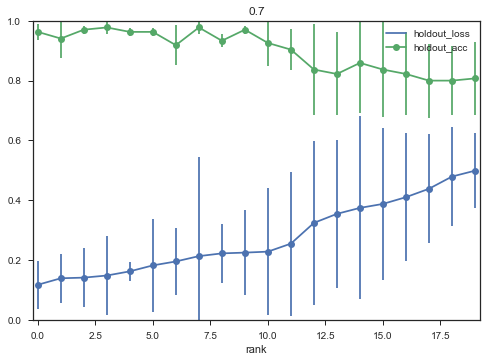

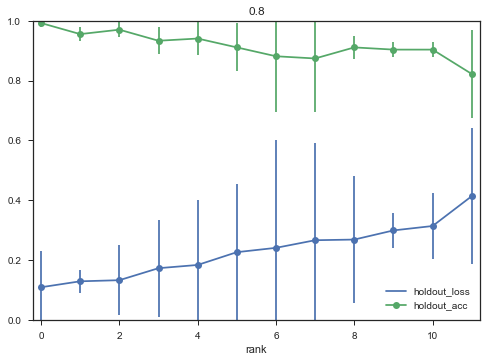

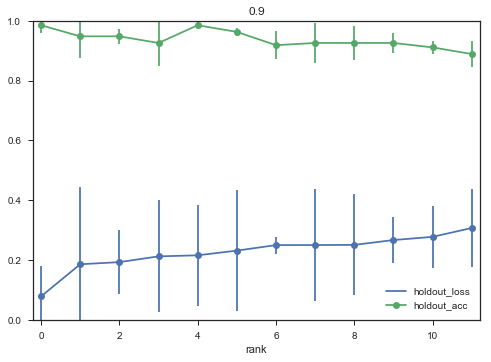

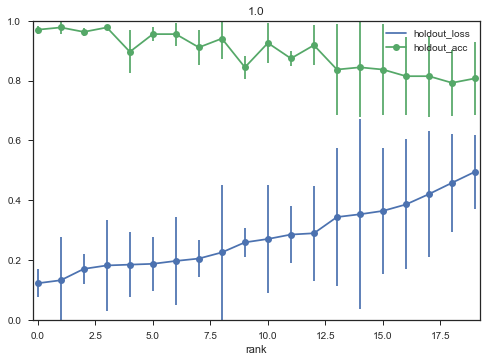

In [10]:
fracs = np.linspace(0.1, 1.0, 10)
losses = []
losses_std = []
accs = []
accs_std = []
extra_params = ['extra_dense', 'lower_cutoff', 'upper_cutoff', 'n_nodes', 'network']
for frac in fracs:
    seeds = [1, 2, 3]
    csv_basename = 'tun-mol-seed-{}-frac-train-%s-performance.csv' % frac
    df_combined = notebook_utils.get_average_df(seeds=seeds, csv_basename=csv_basename, model_root=model_root, extra_params=extra_params)
    notebook_utils.plot_ranked_performance(df_combined, title=frac)
    best_idx = df_combined.holdout_loss.idxmin()
    losses.append(df_combined.loc[best_idx, 'holdout_loss'])
    losses_std.append(df_combined.loc[best_idx, 'holdout_loss_std'])
    accs.append(df_combined.loc[best_idx, 'holdout_acc'])
    accs_std.append(df_combined.loc[best_idx, 'holdout_acc_std'])

    print(df_combined.loc[best_idx, 'basename'])

# Baseline for bipy

In [11]:
n_mol = 200.0
n_tun = 100
n_total = n_mol + n_tun
p_mol = n_mol / n_total
p_tun = 1.0 - p_mol
loss = -p_mol * np.log(p_mol) - p_tun * np.log(p_tun)
loss

0.63651416829481278

# Plot training fraction

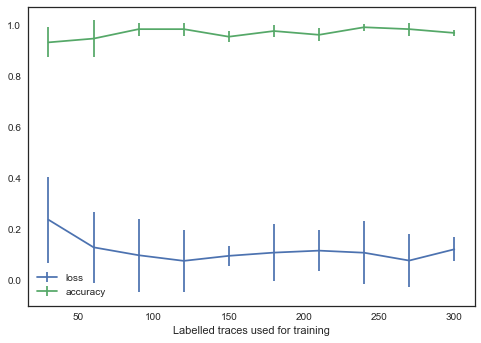

In [7]:
n_train = np.array(fracs)  * 300
plt.errorbar(n_train, losses, yerr=losses_std, label='loss')
plt.errorbar(n_train, accs, yerr=accs_std, label='accuracy')
plt.legend()
plt.xlabel('Labelled traces used for training')

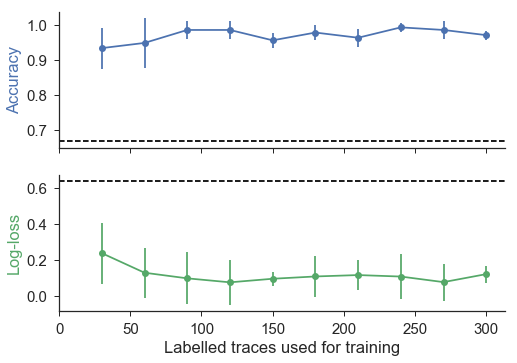

In [21]:
sns.set_style('white', {'xtick.major.size':5,'ytick.major.size':5, 'xtick.minor.size':5},)
colors = sns.color_palette()

f, (ax1, ax2) = plt.subplots(2,1)

ax1.errorbar(n_train, accs, yerr=accs_std, fmt='o-', color=colors[0])
xmin, xmax = ax1.get_xlim()
ax1.hlines(p_mol, 0, xmax, linestyles='dashed')
ax1.set_xlim([0, xmax])

ax2.errorbar(n_train, losses, yerr=losses_std, fmt='o-', color=colors[1])
xmin, xmax = ax2.get_xlim()
ax2.hlines(loss, 0, xmax, linestyles='dashed')
ax2.set_xlim([0, xmax])
tkw = dict(size=4, width=1.5)

ax1.set_ylabel('Accuracy')
ax1.yaxis.label.set_color(colors[0])
plt.setp(ax1.get_xticklabels(), visible=False)

ax2.set_ylabel('Log-loss')
ax2.yaxis.label.set_color(colors[1])

ax2.set_xlabel('Labelled traces used for training')

sns.despine()
plt.savefig('../reports/figures/n_traces_used.pdf', bbox_inches='tight')
plt.savefig('../reports/figures/n_traces_used.eps', bbox_inches='tight')
plt.savefig('/Users/primdal/Dropbox/Uni/manuscripts/determine_structure/figs/n_traces_used.eps', bbox_inches='tight')

# Frac = 0.1

In [128]:
seeds = [1, 2, 3]
csv_basename = 'tun-mol-seed-{}-frac-train-0.1-performance.csv'
df_combined = notebook_utils.get_average_df(seeds=seeds, csv_basename=csv_basename, model_root=model_root)

In [129]:
best_loss[0.1] = df_combined.holdout_loss.min()

In [130]:
df_combined.shape

(8, 11)

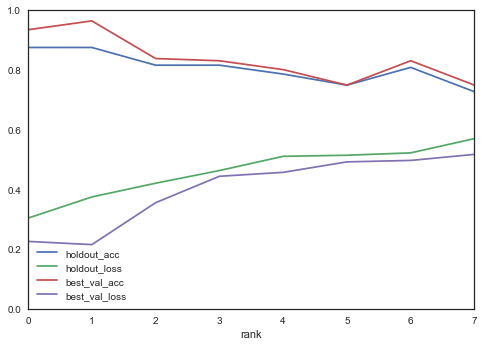

In [131]:
notebook_utils.plot_ranked_performance(df_combined)

# Frac = 0.4

In [132]:
seeds = [1, 2, 3]
csv_basename = 'tun-mol-seed-{}-frac-train-0.4-performance.csv'
df_combined = notebook_utils.get_average_df(seeds=seeds, csv_basename=csv_basename, model_root=model_root)

In [133]:
best_loss[0.4] = df_combined.holdout_loss.min()

In [134]:
df_combined.shape

(8, 11)

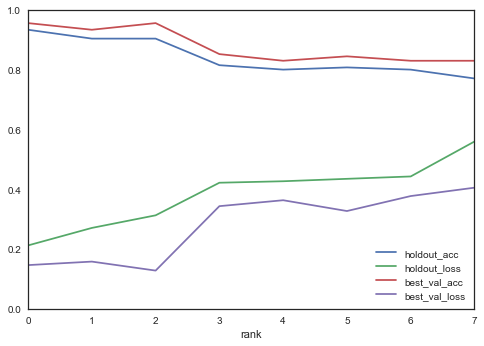

In [135]:
notebook_utils.plot_ranked_performance(df_combined)

# Frac = 0.7

In [136]:
seeds = [1, 2, 3]
csv_basename = 'tun-mol-seed-{}-frac-train-0.7-performance.csv'
df_combined = notebook_utils.get_average_df(seeds=seeds, csv_basename=csv_basename, model_root=model_root)

In [137]:
best_loss[0.7] = df_combined.holdout_loss.min()

In [138]:
df_combined.shape

(6, 11)

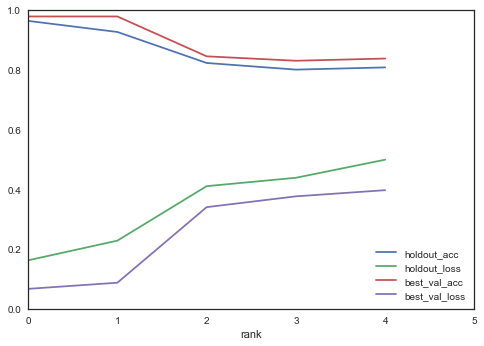

In [139]:
notebook_utils.plot_ranked_performance(df_combined)

# Frac = 1.0

In [21]:
seeds = [1, 2, 3]
csv_basename = 'tun-mol-seed-{}-frac-train-1.0-performance.csv'
df_combined = notebook_utils.get_average_df(seeds=seeds, csv_basename=csv_basename, model_root=model_root, extra_params=extra_params)

In [22]:
best_loss[1.0] = df_combined.holdout_loss.min()

In [23]:
df_combined.shape

(20, 15)

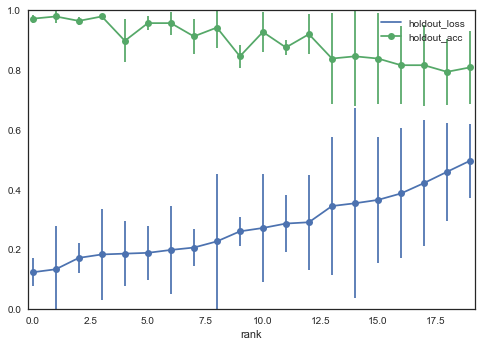

In [25]:
notebook_utils.plot_ranked_performance(df_combined)

In [10]:
df_cut = df_combined[df_combined['rank'] < 10]

In [11]:
ranks = df_cut['rank'].values + 1
acc_mean = df_cut.holdout_acc
acc_std = df_cut.holdout_acc_std

loss_mean = df_cut.holdout_loss
loss_std = df_cut.holdout_loss_std

In [12]:
colors = sns.color_palette()
sns.set_context('poster', font_scale=1.5)
sns.set_style('white')

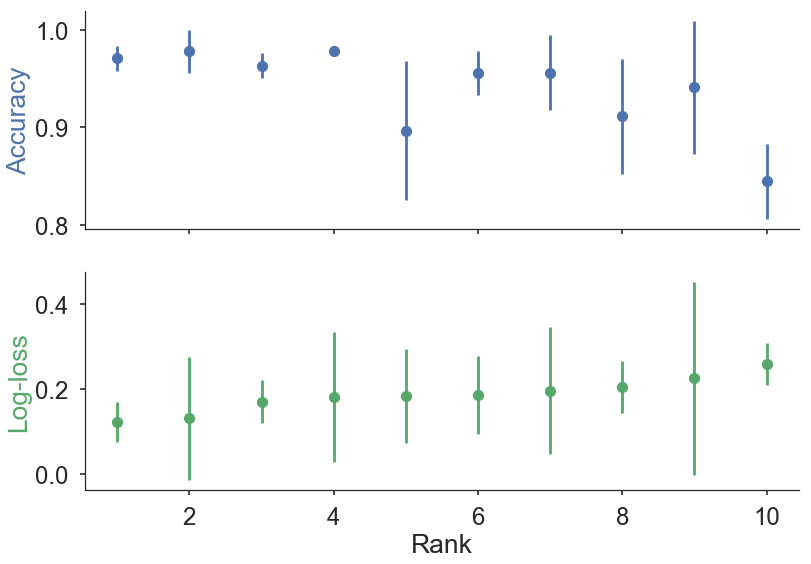

In [30]:
sns.set_style('white', {'xtick.major.size':5,'ytick.major.size':5, 'xtick.minor.size':5},)


f, (ax1, ax2) = plt.subplots(2,1)
ax1.errorbar(ranks, acc_mean, yerr=acc_std, fmt='o', color=colors[0])
ax2.errorbar(ranks, loss_mean, yerr=loss_std, fmt='o', color=colors[1])

tkw = dict(size=4, width=1.5)


ax1.set_ylabel('Accuracy')
ax1.yaxis.label.set_color(colors[0])
plt.setp(ax1.get_xticklabels(), visible=False)


ax2.set_ylabel('Log-loss')
ax2.yaxis.label.set_color(colors[1])

ax2.set_xlabel('Rank')
sns.despine()
plt.savefig('../reports/figures/best_parameters.pdf', bbox_inches='tight')
plt.savefig('../reports/figures/best_parameters.eps', bbox_inches='tight')

# Performance plot

In [172]:
best_loss

{0.1: 0.30331643952652998,
 0.4: 0.21200360352235634,
 0.7: 0.16208425619266667,
 1.0: 0.28510243940966667}

In [173]:
losses = [best_loss[x] for x in fracs]

In [174]:
fracs

[0.1, 0.4, 0.7, 1.0]

In [175]:
losses

[0.30331643952652998,
 0.21200360352235634,
 0.16208425619266667,
 0.28510243940966667]

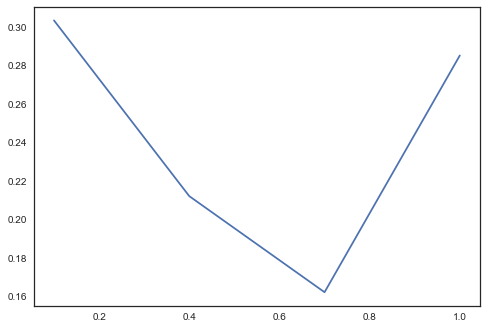

In [176]:
plt.plot(fracs, losses)